Question: Based on age, height, weight, country, sex then predict the likelyhood a person from which country will medal in which sports

Do random Forest for Age, Heignt, Weight, Country  and Sex

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() 

#Load dataset
miniproject = pd.read_csv('athlete_events.csv')

miniproject = miniproject.drop(["Team", "Name","Season","Event","City","Year","Games","Team","ID"], axis=1)
miniproject.head()
miniproject = miniproject[pd.notnull(miniproject['Height'])]
miniproject = miniproject[pd.notnull(miniproject['Sex'])]
miniproject = miniproject[pd.notnull(miniproject['Age'])]
miniproject = miniproject[pd.notnull(miniproject['Weight'])]
miniproject = miniproject[pd.notnull(miniproject['Sport'])]
miniproject = miniproject[pd.notnull(miniproject['NOC'])]
#miniproject = miniproject[pd.notnull(miniproject['Medal'])]
miniproject.head()


# print the label species(setosa, versicolor,virginica)


,Sex,Age,Height,Weight,NOC,Sport,Medal
0,M,24.0,180.0,80.0,CHN,Basketball,NaN
1,M,23.0,170.0,60.0,CHN,Judo,NaN
4,F,21.0,185.0,82.0,NED,Speed Skating,NaN
5,F,21.0,185.0,82.0,NED,Speed Skating,NaN
6,F,25.0,185.0,82.0,NED,Speed Skating,NaN


C:\Users\tayke\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\tayke\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\tayke\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

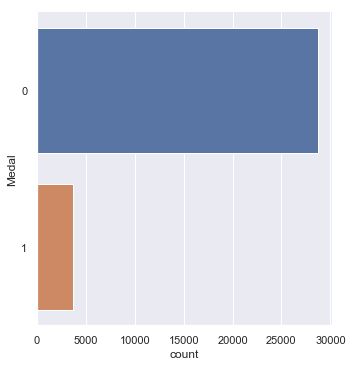

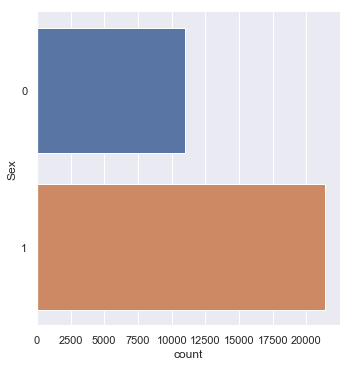

In [52]:
Sports = ['Athletics','Gymnastics', 'Rowing ', 'Swimming ', 'Hockey ']

Athletics = miniproject.loc[miniproject.Sport == 'Athletics']
Gymnastics = miniproject.loc[miniproject.Sport == 'Gymnastics']
Rowing = miniproject.loc[miniproject.Sport == 'Rowing']
Swimming = miniproject.loc[miniproject.Sport == 'Swimming']
Hockey = miniproject.loc[miniproject.Sport == 'Hockey']

#Athletics clean
Athletics.loc[Athletics['Medal'] == 'Bronze', 'Medal'] = 'win'
Athletics.loc[Athletics['Medal'] == 'Gold', 'Medal'] = 'win'
Athletics.loc[Athletics['Medal'] == 'Silver', 'Medal'] = 'win'
Athletics.loc[Athletics['Medal'] == 'win', 'Medal'] = '1'
Athletics.loc[Athletics['Sex'] == 'M', 'Sex'] = '1'
Athletics.loc[Athletics['Sex'] == 'F', 'Sex'] = '0'
Athletics['Medal'] = Athletics.Medal.fillna(0).astype(int)

#Gymnastics clean
Gymnastics.loc[Gymnastics['Medal'] == 'Bronze', 'Medal'] = 'win'
Gymnastics.loc[Gymnastics['Medal'] == 'Gold', 'Medal'] = 'win'
Gymnastics.loc[Gymnastics['Medal'] == 'Silver', 'Medal'] = 'win'
Gymnastics.loc[Gymnastics['Medal'] == 'win', 'Medal'] = '1'
Gymnastics.loc[Gymnastics['Sex'] == 'M', 'Sex'] = '1'
Gymnastics.loc[Gymnastics['Sex'] == 'F', 'Sex'] = '0'
Gymnastics['Medal'] = Gymnastics.Medal.fillna(0).astype(int)

#Rowing clean
Rowing.loc[Rowing['Medal'] == 'Bronze', 'Medal'] = 'win'
Rowing.loc[Rowing['Medal'] == 'Gold', 'Medal'] = 'win'
Rowing.loc[Rowing['Medal'] == 'Silver', 'Medal'] = 'win'
Rowing.loc[Rowing['Medal'] == 'win', 'Medal'] = '1'
Rowing.loc[Rowing['Sex'] == 'M', 'Sex'] = '1'
Rowing.loc[Rowing['Sex'] == 'F', 'Sex'] = '0'
Rowing['Medal'] = Rowing.Medal.fillna(0).astype(int)

#Swimming clean
Swimming.loc[Swimming['Medal'] == 'Bronze', 'Medal'] = 'win'
Swimming.loc[Swimming['Medal'] == 'Gold', 'Medal'] = 'win'
Swimming.loc[Swimming['Medal'] == 'Silver', 'Medal'] = 'win'
Swimming.loc[Swimming['Medal'] == 'win', 'Medal'] = '1'
Swimming.loc[Swimming['Sex'] == 'M', 'Sex'] = '1'
Swimming.loc[Swimming['Sex'] == 'F', 'Sex'] = '0'
Swimming['Medal'] = Swimming.Medal.fillna(0).astype(int)

#Athletics clean
Hockey.loc[Hockey['Medal'] == 'Bronze', 'Medal'] = 'win'
Hockey.loc[Hockey['Medal'] == 'Gold', 'Medal'] = 'win'
Hockey.loc[Hockey['Medal'] == 'Silver', 'Medal'] = 'win'
Hockey.loc[Hockey['Medal'] == 'win', 'Medal'] = '1'
Hockey.loc[Hockey['Sex'] == 'M', 'Sex'] = '1'
Hockey.loc[Hockey['Sex'] == 'F', 'Sex'] = '0'
Hockey['Medal'] = Hockey.Medal.fillna(0).astype(int)

#mini['Sex'] = mini.Sex.fillna(0).astype(int)

sb.catplot(y = 'Medal', data = Athletics, kind = "count")
sb.catplot(y = 'Sex', data = Athletics, kind = "count")


In [46]:
# Extract only the numeric data variables
AthleticsDF = pd.DataFrame(Athletics[["Sex", "Age", "Height", "Weight", "Medal"]])
GymnasticsDF = pd.DataFrame(Gymnastics[["Sex", "Age", "Height", "Weight", "Medal"]])
RowingDF = pd.DataFrame(Rowing[["Sex", "Age", "Height", "Weight", "Medal"]])
SwimmingDF = pd.DataFrame(Swimming[["Sex", "Age", "Height", "Weight", "Medal"]])
HockeyDF = pd.DataFrame(Hockey[["Sex", "Age", "Height", "Weight", "Medal"]])


# Summary Statistics for all Variables
AthleticsDF.describe()

,Age,Height,Weight,Medal
count,32374.000000,32374.000000,32374.000000,32374.000000
mean,25.330203,176.276456,69.273738,0.112683
std,4.407144,9.334547,15.420490,0.316210
min,12.000000,142.000000,35.000000,0.000000
25%,22.000000,170.000000,59.000000,0.000000
50%,25.000000,176.000000,67.000000,0.000000
75%,28.000000,183.000000,76.000000,0.000000
max,52.000000,208.000000,165.000000,1.000000


In [42]:
GymnasticsDF.describe()

,Age,Height,Weight,Medal
count,18271.000000,18271.000000,18271.000000,18271.000000
mean,21.688359,162.859668,56.885118,0.063543
std,4.343650,8.279994,9.814196,0.243944
min,13.000000,127.000000,25.000000,0.000000
25%,18.000000,158.000000,50.000000,0.000000
50%,21.000000,164.000000,58.000000,0.000000
75%,25.000000,169.000000,64.000000,0.000000
max,44.000000,188.000000,102.000000,1.000000


In [43]:
RowingDF.describe()

,Age,Height,Weight,Medal
count,7790.000000,7790.000000,7790.000000,7790.000000
mean,25.413607,184.265982,80.168870,0.270090
std,4.361378,9.908795,13.145006,0.444035
min,12.000000,132.000000,38.000000,0.000000
25%,22.000000,179.000000,72.000000,0.000000
50%,25.000000,185.000000,82.000000,0.000000
75%,28.000000,191.000000,90.000000,1.000000
max,60.000000,209.000000,137.000000,1.000000


In [44]:
SwimmingDF.describe()

,Age,Height,Weight,Medal
count,18776.000000,18776.000000,18776.000000,18776.000000
mean,20.622870,178.602844,70.597784,0.132403
std,3.745659,9.888285,11.329306,0.338937
min,11.000000,138.000000,39.000000,0.000000
25%,18.000000,171.000000,62.000000,0.000000
50%,20.000000,179.000000,70.000000,0.000000
75%,23.000000,186.000000,79.000000,0.000000
max,41.000000,209.000000,114.000000,1.000000


In [45]:
HockeyDF.describe()

,Age,Height,Weight,Medal
count,4264.000000,4264.000000,4264.000000,4264.000000
mean,25.647514,173.387899,69.164869,0.273921
std,3.921862,8.357124,9.533711,0.446021
min,15.000000,138.000000,45.000000,0.000000
25%,23.000000,168.000000,62.000000,0.000000
50%,25.000000,173.000000,69.000000,0.000000
75%,28.000000,180.000000,76.000000,1.000000
max,44.000000,200.000000,105.000000,1.000000


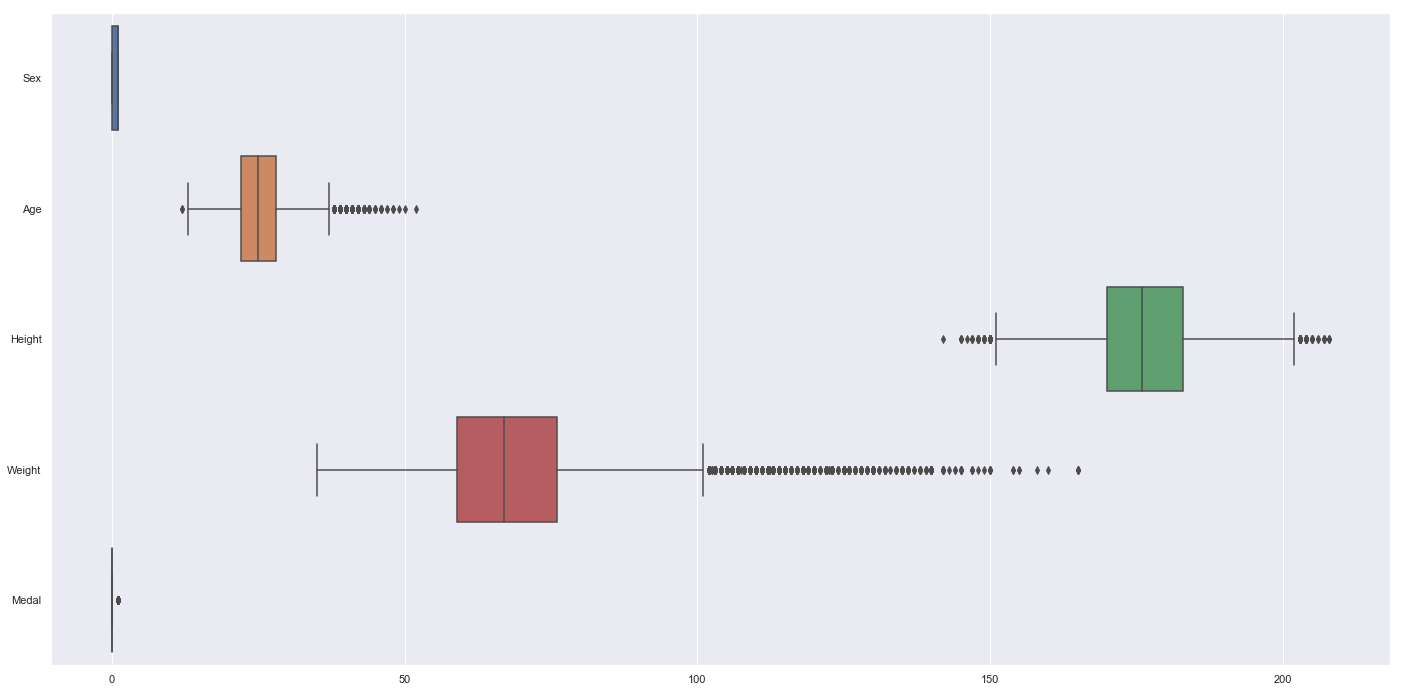

In [47]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = AthleticsDF, orient = "h")

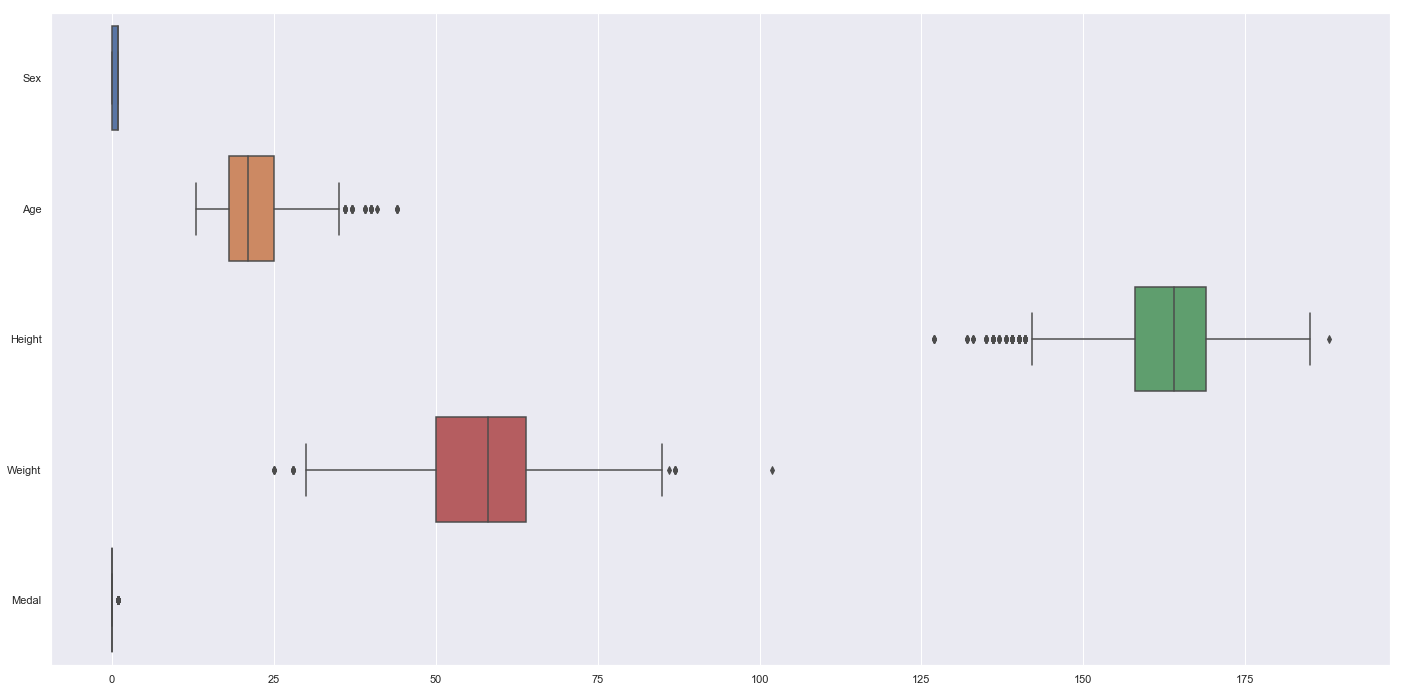

In [48]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = GymnasticsDF, orient = "h")

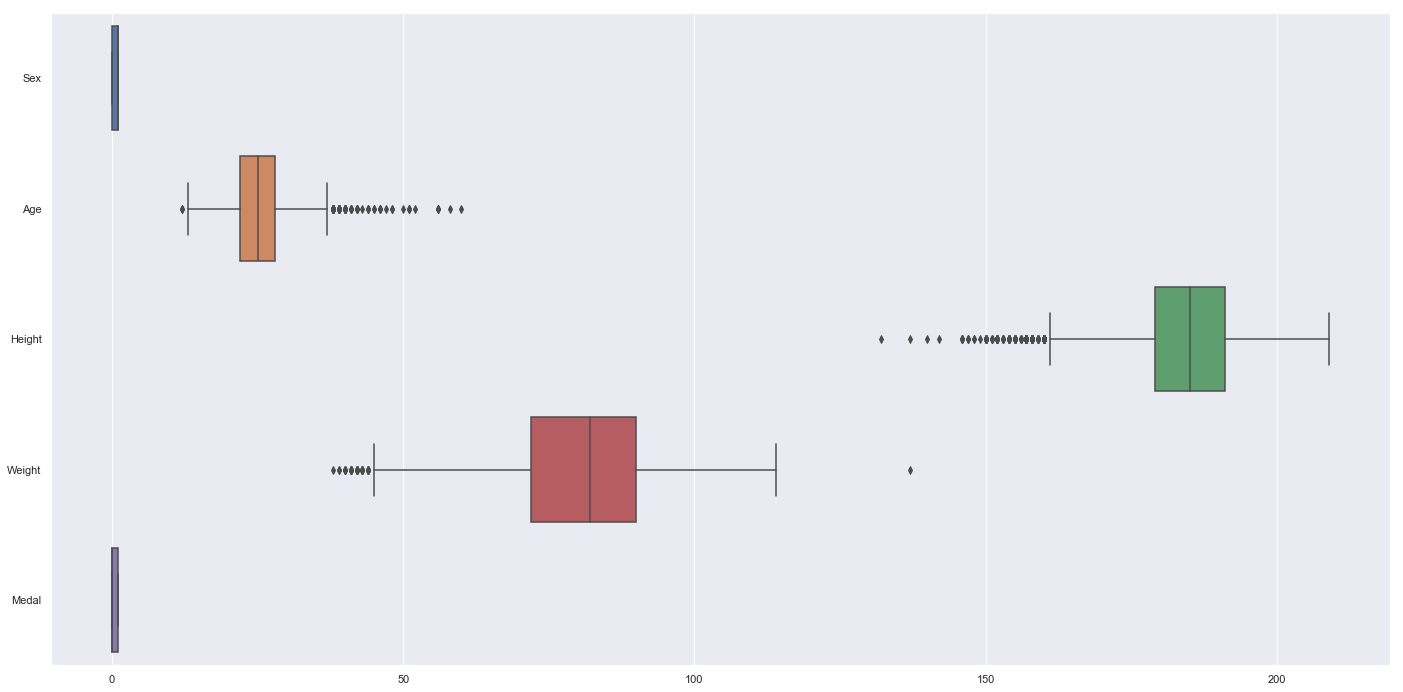

In [49]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = RowingDF, orient = "h")

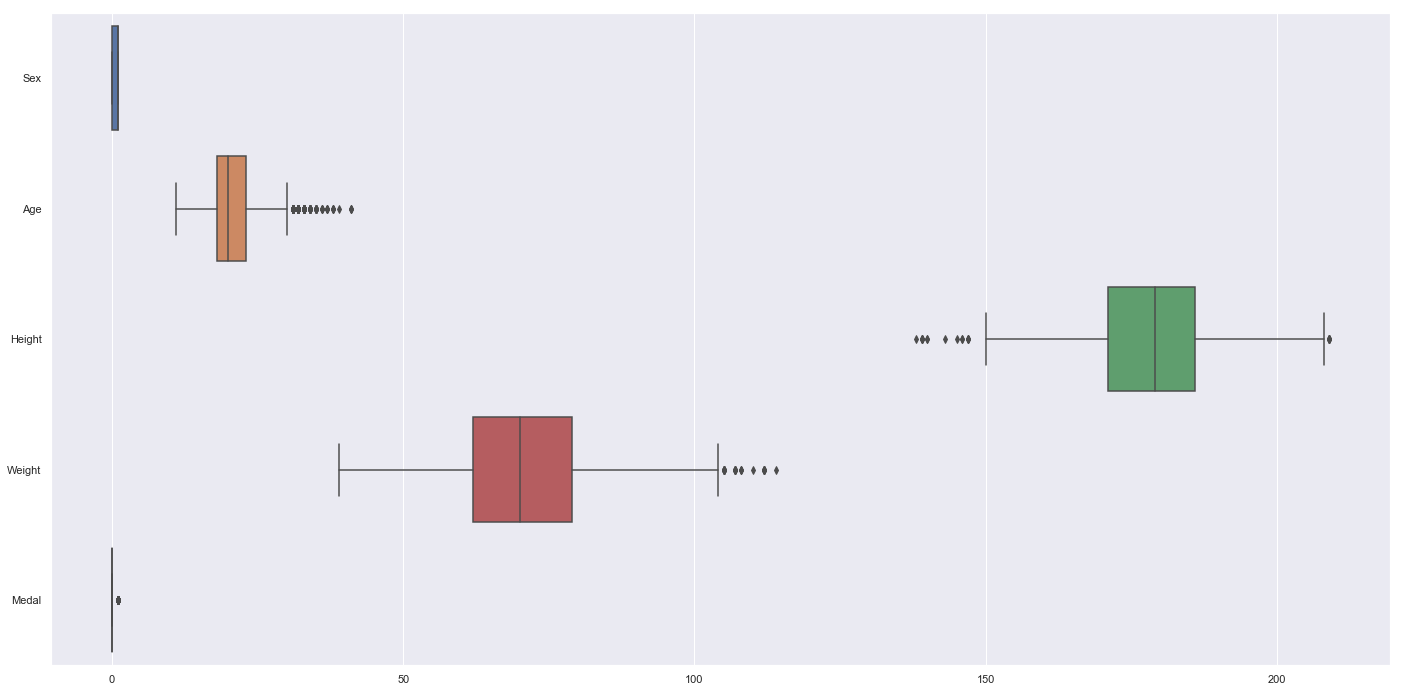

In [50]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = SwimmingDF, orient = "h")

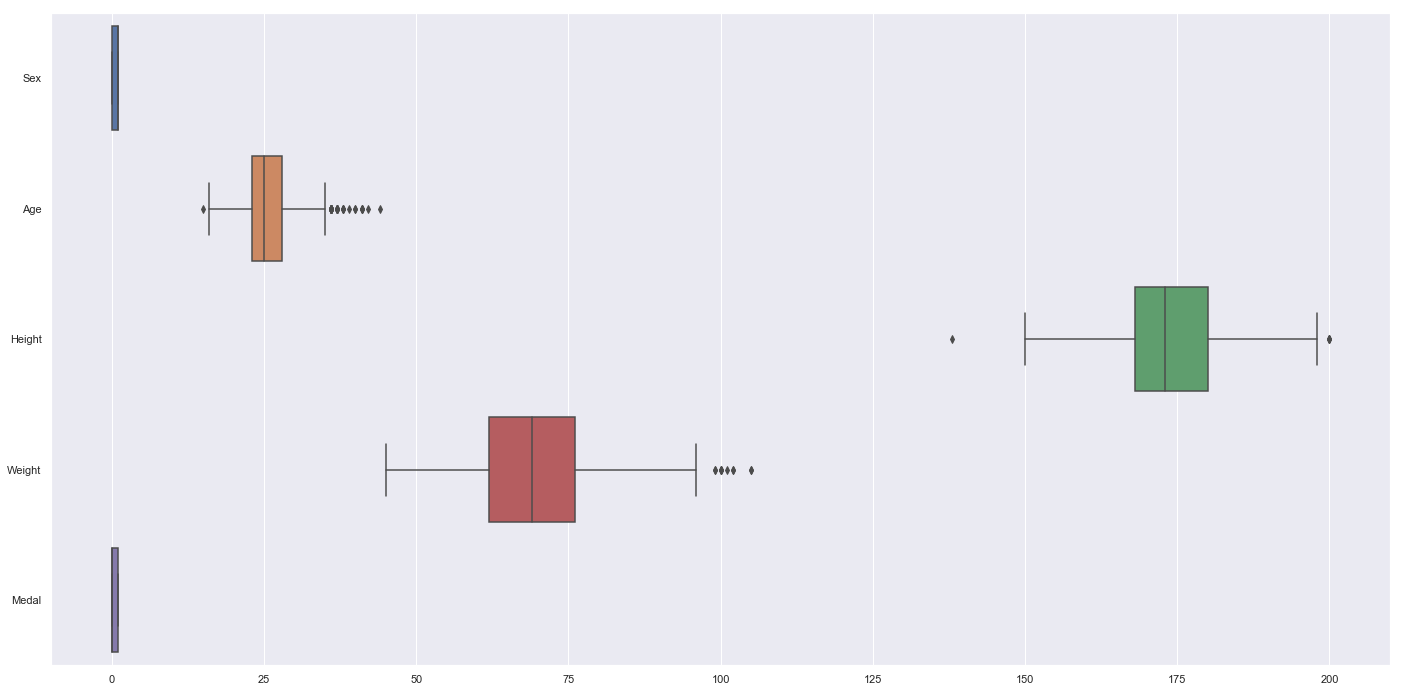

In [51]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = HockeyDF, orient = "h")

In [34]:
mini = pd.DataFrame()

for sport in Sports:
    sample = miniproject.loc[miniproject.Sport == sport].sample(n=2000)
    print(sample.count())
    mini = pd.concat([mini, sample])

mini

Sex       2000
Age       2000
Height    2000
Weight    2000
NOC       2000
Sport     2000
Medal      208
dtype: int64
Sex       2000
Age       2000
Height    2000
Weight    2000
NOC       2000
Sport     2000
Medal      144
dtype: int64


ValueError: a must be greater than 0

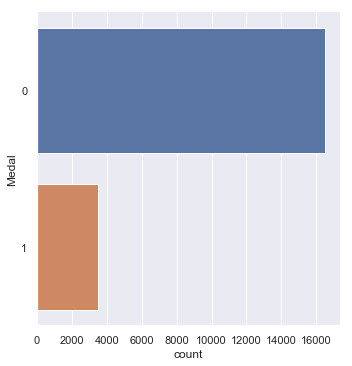

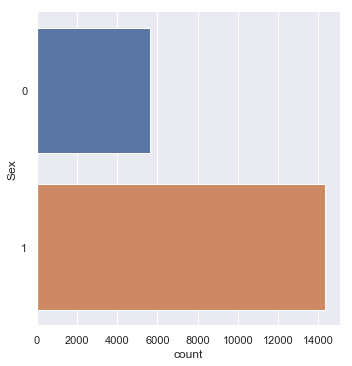

In [5]:
mini.loc[mini['Medal'] == 'Bronze', 'Medal'] = 'win'
mini.loc[mini['Medal'] == 'Gold', 'Medal'] = 'win'
mini.loc[mini['Medal'] == 'Silver', 'Medal'] = 'win'
mini.loc[mini['Medal'] == 'win', 'Medal'] = '1'
mini.loc[mini['Sex'] == 'M', 'Sex'] = '1'
mini.loc[mini['Sex'] == 'F', 'Sex'] = '0'
mini['Medal'] = mini.Medal.fillna(0).astype(int)

#mini['Sex'] = mini.Sex.fillna(0).astype(int)


sb.catplot(y = 'Medal', data = mini, kind = "count")

sb.catplot(y = 'Sex', data = mini, kind = "count")

In [6]:
all1 = mini

In [7]:
all1.info

<bound method DataFrame.info of        Sex   Age  Height  Weight  NOC   Sport  Medal
8104     1  35.0   180.0    80.0  EUN  Hockey      0
168122   0  22.0   169.0    55.0  AUS  Hockey      0
221341   1  17.0   174.0    72.0  UGA  Hockey      0
5517     1  29.0   188.0    87.0  KEN  Hockey      0
2068     1  21.0   167.0    55.0  KEN  Hockey      0
10180    1  22.0   171.0    65.0  PAK  Hockey      0
221002   1  33.0   175.0    58.0  IND  Hockey      1
178131   0  26.0   164.0    58.0  NZL  Hockey      0
202329   0  27.0   164.0    54.0  GER  Hockey      1
9685     0  26.0   167.0    58.0  ARG  Hockey      1
146436   0  24.0   169.0    61.0  GBR  Hockey      1
37053    1  27.0   175.0    76.0  GBR  Hockey      0
230124   0  34.0   173.0    74.0  GBR  Hockey      1
3141     0  27.0   155.0    51.0  JPN  Hockey      0
68218    1  20.0   165.0    60.0  MEX  Hockey      0
249918   1  29.0   174.0    69.0  FRA  Hockey      0
7981     0  27.0   162.0    65.0  AUS  Hockey      1
82443    1  27

In [8]:
# Extract only the numeric data variables
numDF = pd.DataFrame(all1[["Sex", "Age", "Height", "Weight", "Medal"]])

# Summary Statistics for all Variables
numDF.describe()

,Age,Height,Weight,Medal
count,20000.00000,20000.000000,20000.000000,20000.000000
mean,24.83120,177.964600,73.282775,0.174750
std,4.42425,10.861968,14.715898,0.379763
min,12.00000,130.000000,35.000000,0.000000
25%,22.00000,170.000000,63.000000,0.000000
50%,24.00000,178.000000,72.000000,0.000000
75%,28.00000,185.000000,81.000000,0.000000
max,56.00000,223.000000,214.000000,1.000000


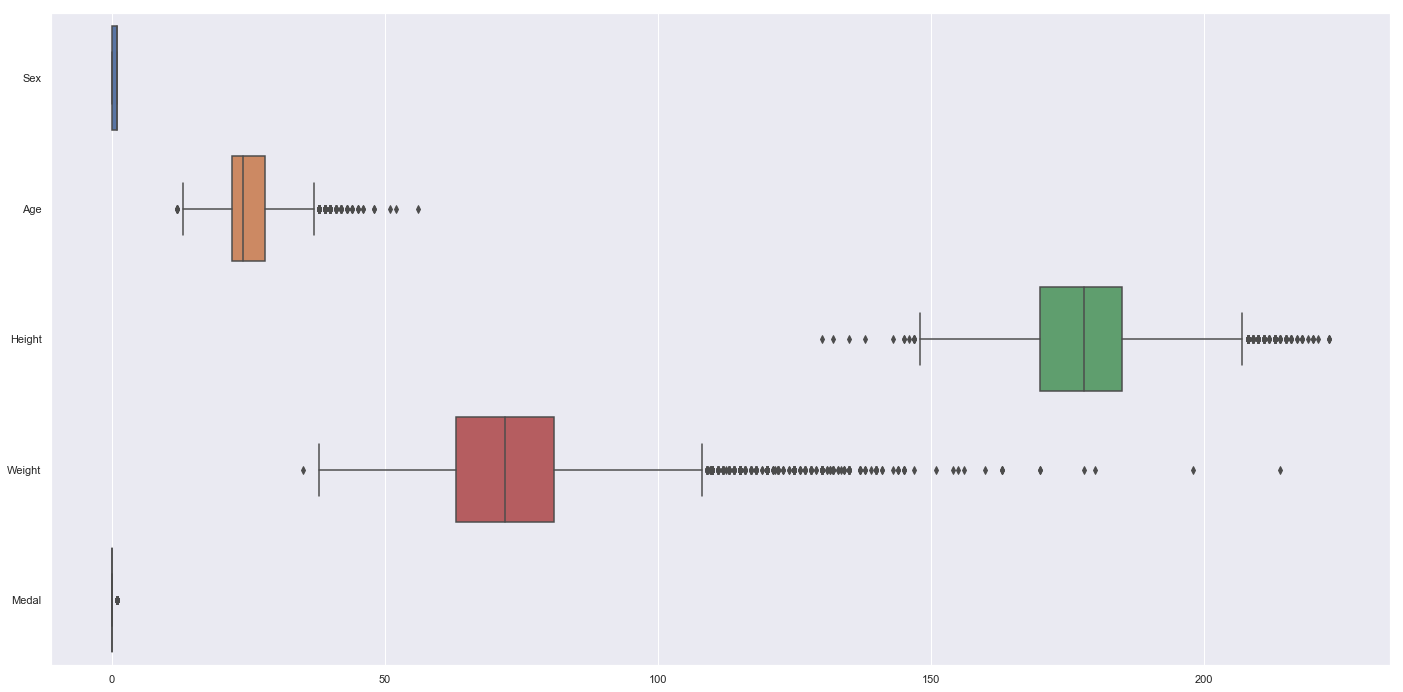

In [9]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = numDF, orient = "h")

In [12]:
from sklearn.model_selection import train_test_split
#Sex   Age  Height  Weight  NOC      Sport  Medal
#X=mini[['Sex', 'Age', 'Height', 'Weight', 'NOC']]  # Features
X=all1[['Age', 'Height', 'Weight','Medal','Sex']]
y=all1['Sport']
z=all1['NOC']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000, max_depth=10)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
A=clf.predict([[100,140,100,1,1]]) 
print(A)
# age,height,weight
# 0 for lose, 1 for win 
# 0 for female ,1 for male
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.09433333333333334
['Judo']


array([[ 44, 100,  38,  42,  47,  84,  40, 105,  60,  69],
       [ 40,  86,  41,  38,  55,  89,  41,  79,  60,  38],
       [ 44,  96,  31,  51,  65,  87,  39,  70,  68,  54],
       [ 35, 100,  30,  45,  49,  95,  48,  68,  68,  52],
       [ 48,  88,  24,  41,  44,  78,  58,  99,  59,  53],
       [ 39,  84,  31,  45,  42,  86,  41,  86,  85,  46],
       [ 47, 102,  36,  50,  48,  94,  46,  87,  67,  49],
       [ 44,  94,  23,  46,  59, 104,  36,  67,  58,  55],
       [ 50, 107,  20,  63,  48,  93,  47,  84,  58,  49],
       [ 47,  83,  40,  41,  44,  82,  55,  75,  75,  59]], dtype=int64)

In [14]:
y_pred

array(['Judo', 'Athletics', 'Swimming', ..., 'Hockey', 'Canoeing',
       'Hockey'], dtype=object)

In [15]:
z_pred=clf.predict(X_test)
#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=400)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,z_train)
z_pred=clf1.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(z_test, z_pred))
clf1.predict([[25,174,60,1,1]])  

KeyboardInterrupt: 

# which variable is more important- https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [24]:
feature_list = sorted(zip(map(lambda x: round(x, 2), clf.feature_importances_), X),
             reverse=True)

# Print them out
print('feature\t\timportance')
print("\n".join(['{}\t\t{}'.format(f,i) for i,f in feature_list]))
print('total_importance\t\t',  sum([i for i,f in feature_list]))

feature		importance
Weight		0.32
Height		0.31
Age		0.27
Medal		0.05
Sex		0.04
total_importance		 0.9900000000000001


In [17]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['Age', 'Height', 'Weight','Medal','Sex']).sort_values(ascending=False)
feature_imp

Weight    0.325783
Height    0.296493
Age       0.284041
Medal     0.053598
Sex       0.040085
dtype: float64

No handles with labels found to put in legend.


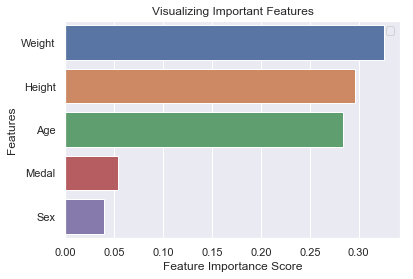

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [19]:
feature_list = sorted(zip(map(lambda x: round(x, 2), clf1.feature_importances_), X),
             reverse=True)

# Print them out
print('feature\t\timportance')
print("\n".join(['{}\t\t{}'.format(f,i) for i,f in feature_list]))
print('total_importance\t\t',  sum([i for i,f in feature_list]))

feature		importance
Weight		0.36
Age		0.33
Height		0.3
Sex		0.01
Medal		0.01
total_importance		 1.01


In [20]:
import pandas as pd
feature1_imp = pd.Series(clf1.feature_importances_,index=['Age', 'Height', 'Weight','Medal','Sex']).sort_values(ascending=False)
feature1_imp

Weight    0.361736
Age       0.326617
Height    0.300340
Medal     0.005779
Sex       0.005528
dtype: float64

No handles with labels found to put in legend.


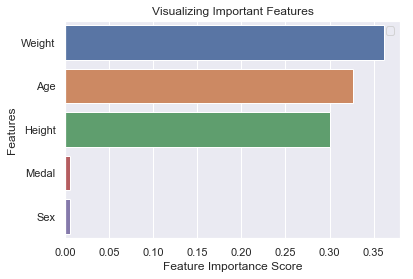

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature1_imp, y=feature1_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in clf.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=['Age', 'Height', 'Weight','Medal','Sex'],
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1


# Convert to png
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')